## Creating CNN Using Scratch and Transfer Learning. 

In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# Re-size all the images
IMAGE_SIZE = [224,224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [3]:
#import vgg16 library and add preprocessing layer to the front of VGG
#Here we will be using imagenet weights.
vgg19 = VGG19(input_shape= IMAGE_SIZE + [3], weights= 'imagenet', include_top=False)

In [4]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
#Dont train existing weights
for layer in vgg19.layers:
    layer.trainable= False

In [6]:
#useful for getting number of output classes.
folders = glob('Dataset/Train/*')

In [7]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [8]:
x = Flatten()(vgg19.output)

In [9]:
prediction = Dense(len(folders), activation= 'softmax')(x)

#create a model object
model = Model(inputs= vgg19.input, outputs = prediction)

In [10]:
#view the structure of model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras.layers import MaxPooling2D

In [12]:
# create model from scratch using CNN
model= Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [13]:
#tell the model what cost and optimization to use
model.compile(
  loss= 'categorical_crossentropy',
  optimizer= 'adam',
  metrics=['accuracy'])

In [14]:
#use the image data generator to import the images from datasets.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip= True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 416 images belonging to 2 classes.


In [16]:
training_set

In [17]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 134 images belonging to 2 classes.


In [18]:
test_set

In [19]:
#fit the model
r = model.fit_generator(
   training_set,
   validation_data=test_set,
   epochs=20,
   steps_per_epoch= len(training_set),
   validation_steps= len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 5 steps
Epoch 1/20
13/13 [==============================] - 34s 3s/step - loss: 1.7171 - accuracy: 0.4760 - val_loss: 0.6563 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 26s 2s/step - loss: 0.6421 - accuracy: 0.5865 - val_loss: 0.7001 - val_accuracy: 0.4104
Epoch 3/20
13/13 [==============================] - 28s 2s/step - loss: 0.4976 - accuracy: 0.7716 - val_loss: 1.0626 - val_accuracy: 0.4179
Epoch 4/20
13/13 [==============================] - 29s 2s/step - loss: 0.4390 - accuracy: 0.7716 - val_loss: 1.1690 - val_accuracy: 0.3433
Epoch 5/20
13/13 [==============================] - 27s 2s/step - loss: 0.4279 - accuracy: 0.8101 - val_loss: 0.7176 - val_accuracy: 0.4851
Epoch 6/20
13/13 [==============================] - 28s 2s/step - loss: 0.3934 - accuracy: 0.8365 - val_loss: 0.6152 - val_accuracy: 

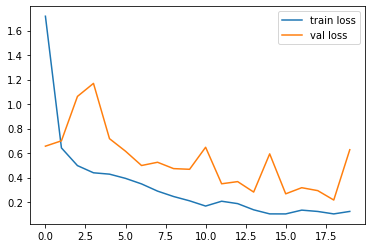

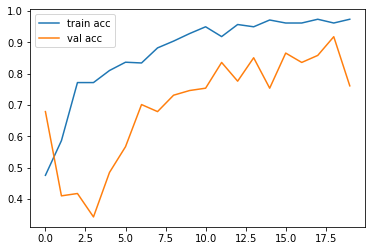

<Figure size 432x288 with 0 Axes>

In [20]:
#plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [21]:
#save it as h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[2.08475608e-02, 9.79152381e-01],
       [1.60878032e-01, 8.39121938e-01],
       [2.20749110e-01, 7.79250920e-01],
       [1.22073619e-02, 9.87792671e-01],
       [2.31951717e-02, 9.76804793e-01],
       [2.44036522e-02, 9.75596368e-01],
       [1.58447605e-02, 9.84155297e-01],
       [9.29789543e-01, 7.02104345e-02],
       [9.99952674e-01, 4.73138498e-05],
       [9.99980688e-01, 1.92633579e-05],
       [2.17453577e-02, 9.78254676e-01],
       [1.82395373e-02, 9.81760442e-01],
       [9.99470055e-01, 5.29924058e-04],
       [1.52887711e-02, 9.84711230e-01],
       [9.99999881e-01, 1.16181845e-07],
       [9.44471300e-01, 5.55287190e-02],
       [9.91217017e-01, 8.78302660e-03],
       [9.99559820e-01, 4.40112170e-04],
       [9.99439657e-01, 5.60361950e-04],
       [2.21725013e-02, 9.77827489e-01],
       [4.41226572e-01, 5.58773458e-01],
       [5.26973307e-01, 4.73026693e-01],
       [1.87735073e-02, 9.81226444e-01],
       [9.99959230e-01, 4.07174812e-05],
       [1.000000

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model= load_model('model_vgg19.h5')

In [28]:
img = image.load_img('Dataset/Test/Uninfected/3.png', target_size=(224,224))


In [29]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
x= np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [34]:
a = np.argmax(model.predict(img_data), axis=1)


In [35]:
if (a==1):
    print('Uninfected')
else:
    print('Infected')

Uninfected
